In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape

(13320, 9)

In [ ]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [ ]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '19 BHK', '43 BHK', '14 BHK',
       '12 BHK', '13 BHK', '18 BHK', '10 Bedroom', '11 Bedroom', '10 BHK',
       '16 BHK', '43 Bedroom', '8 BHK', '12 Bedroom', '18 Bedroom'],
      dtype=object)

In [ ]:
df3['bhk']=df3['size'].apply(lambda x: int(x[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df3['bhk'].unique()

array([2, 4, 3, 6, 1, 8, 7, 5, 9])

In [ ]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk


In [ ]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
      return False
  return True


In [ ]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_to_num(x):
  tokens=x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None    

In [ ]:
convert_sqft_to_num('2100-2850')

2475.0

In [ ]:
convert_sqft_to_num('3067-8156')

5611.5

In [ ]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [ ]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [ ]:
# feature engineering technique and dynamic reductionality testing
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [ ]:
df5.location=df5.location.apply(lambda x: x.strip())

location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats


location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [ ]:
len(location_stats[location_stats<=10])

1052

In [ ]:
loc_stats_less_10=location_stats[location_stats<=10]
loc_stats_less_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [ ]:
df5.location=df5.location.apply(lambda x: 'other'if x in loc_stats_less_10 else x)

In [ ]:
len(df5.location.unique())

242

In [ ]:
len(loc_stats_less_10)

1052

In [ ]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
# if u want to remove the outliers USE negate
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12518, 7)

In [ ]:
df6.price_per_sqft.describe()

count     12472.000000
mean       6321.224286
std        4188.395933
min         267.829813
25%        4210.526316
50%        5295.544522
75%        6929.522602
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7=remove_pps_outliers(df6)
df7.shape

(10255, 7)

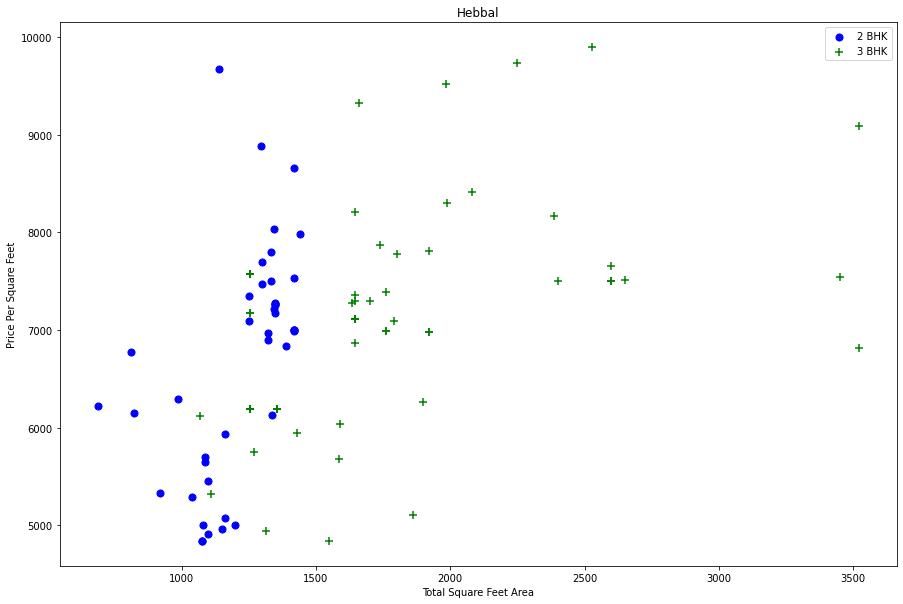

In [ ]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Square Feet")
  plt.title(location)
  plt.legend()
  
plot_scatter_chart(df7,"Hebbal")

In [ ]:
# Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for locaion, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape


(7315, 7)

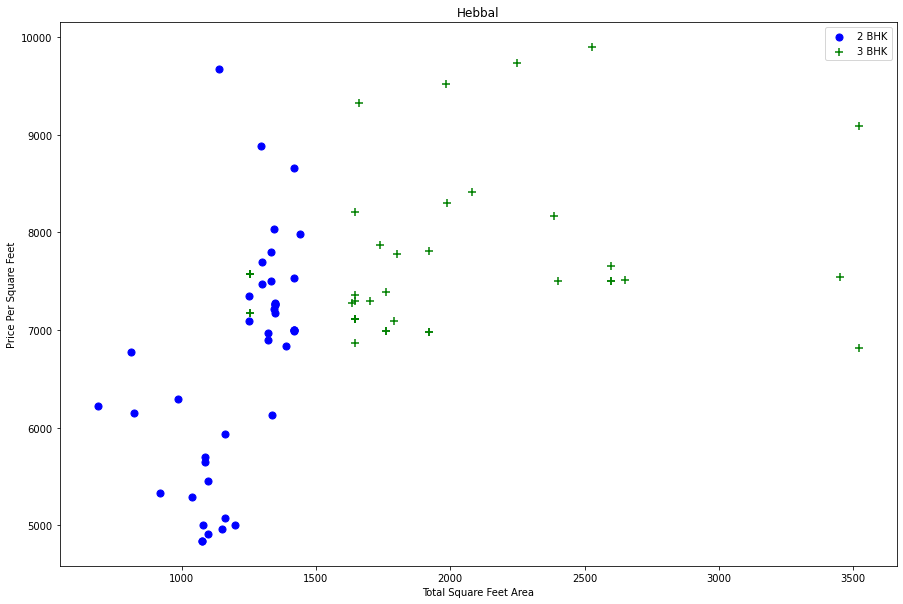

In [ ]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

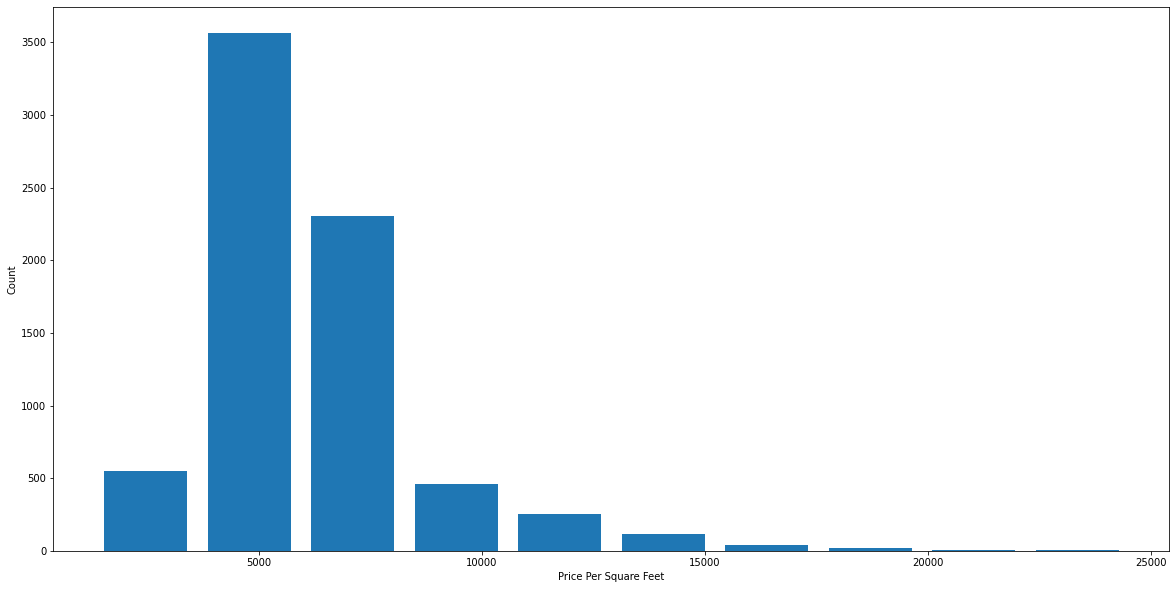

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 10., 12., 16., 15.,
       13.])

In [ ]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5286,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,1,4000.000000
8497,other,10 BHK,12000.0,12.0,525.0,1,4375.000000
8586,other,16 BHK,10000.0,16.0,550.0,1,5500.000000
8816,other,14 BHK,1250.0,15.0,125.0,1,10000.000000
9322,other,11 BHK,6000.0,12.0,150.0,1,2500.000000
9653,other,13 BHK,5425.0,13.0,275.0,1,5069.124424


Text(0, 0.5, 'Count')

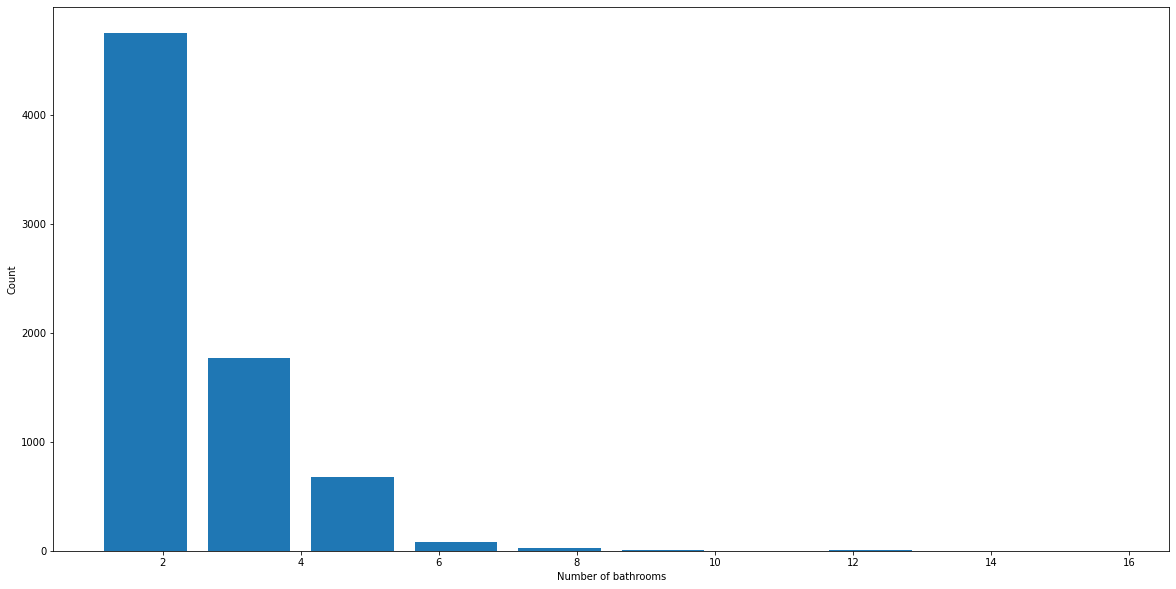

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5138,Munnekollal,10 Bedroom,7200.0,10.0,200.0,1,2777.777778
5247,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5286,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,1,4000.000000
6720,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8035,other,11 BHK,5000.0,9.0,360.0,1,7200.000000
8265,other,10 Bedroom,750.0,10.0,90.0,1,12000.000000
8422,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
8497,other,10 BHK,12000.0,12.0,525.0,1,4375.000000
8586,other,16 BHK,10000.0,16.0,550.0,1,5500.000000


In [ ]:
df9 = df8[df8.bath>df8.bhk+2]
df9.shape

(15, 7)

In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
1626,Chikkabanavar,2460.0,7.0,80.0,4
5138,Munnekollal,7200.0,10.0,200.0,1
5247,Nagasandra,7000.0,8.0,450.0,4


In [ ]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Chikkabanavar,Munnekollal,Nagasandra,Neeladri Nagar,Thanisandra,other
1626,1,0,0,0,0,0
5138,0,1,0,0,0,0
5247,0,0,1,0,0,0


In [ ]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,Chikkabanavar,Munnekollal,Nagasandra,Neeladri Nagar,Thanisandra
1626,Chikkabanavar,2460.0,7.0,80.0,4,1,0,0,0,0
5138,Munnekollal,7200.0,10.0,200.0,1,0,1,0,0,0
5247,Nagasandra,7000.0,8.0,450.0,4,0,0,1,0,0


In [ ]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,Chikkabanavar,Munnekollal,Nagasandra,Neeladri Nagar,Thanisandra
1626,2460.0,7.0,80.0,4,1,0,0,0,0
5138,7200.0,10.0,200.0,1,0,1,0,0,0


In [ ]:
df12.shape

(15, 9)

In [ ]:
x = df12.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,Chikkabanavar,Munnekollal,Nagasandra,Neeladri Nagar,Thanisandra
1626,2460.0,7.0,4,1,0,0,0,0
5138,7200.0,10.0,1,0,1,0,0,0
5247,7000.0,8.0,4,0,0,1,0,0
5286,4000.0,12.0,1,0,0,0,1,0
6720,1806.0,6.0,3,0,0,0,0,1


In [ ]:
y = df12.price
y.head()

1626     80.0
5138    200.0
5247    450.0
5286    160.0
6720    116.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.25014992477722053

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([ 0.4295225 , -0.96418719,  0.36844379, -0.24209361, -2.22058639])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):

    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
      gs = GridSearchCV(config['model'], config['params'],cv=cv,return_train_score=False)
      gs.fit(x,y)
      scores.append({
          'model':algo_name,
          'best_score':gs.best_score_,
          'best_params':gs.best_params_
      
      })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,-0.506821,{'normalize': True}
1,lasso,-0.389956,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.166164,"{'criterion': 'mse', 'splitter': 'best'}"


In [ ]:
x.columns

Index(['total_sqft', 'bath', 'bhk', 'Chikkabanavar', 'Munnekollal',
       'Nagasandra', 'Neeladri Nagar', 'Thanisandra'],
      dtype='object')

In [ ]:
Xcol = x.columns

In [ ]:
def predict_price(location,sqft,bath,bhk):
  loc_index = np.where(x.columns==location)[0][0]

  z=np.zeros(len(x.columns))
  z[0] = sqft
  z[1] = bath
  z[2] = bhk
  if loc_index >= 0:
    x[loc_index] = 1

  return lr_clf.predict([z])[0]

In [ ]:
predict_price('Chikkabanavar',1000,2,2)

197.83480122537964

In [ ]:
import pickle
with open("Bengaluru_House_Data_model.pickle",'wb') as f:
  pickle.dump(lr_clf,f)

In [ ]:
import json

columns ={
    'data_columns':[col.lower() for col in Xcol]
}

with open("columns.json","w") as f:
  f.write(json.dumps(columns))